In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
# Load dataset
df = pd.read_csv(r"C:\Users\azhar\Downloads\covid updated.csv")
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31-12-2019,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01-01-2020,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02-01-2020,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03-01-2020,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04-01-2020,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [67]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows with no location or date
df.dropna(subset=['location', 'date'], inplace=True)

# OPTIONAL: Filter for a specific country (e.g., India)
country = 'India'
df_country = df[df['location'] == country]

# Fill missing values with 0 for numerical analysis
df_country.fillna(0, inplace=True)

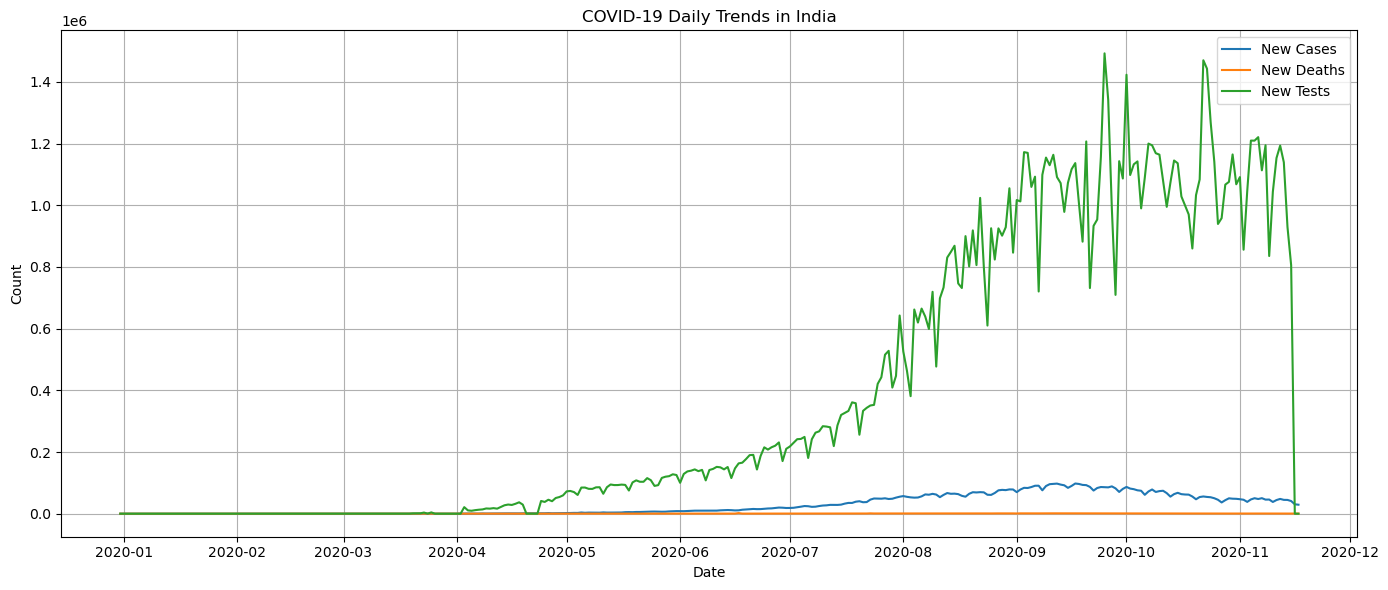

In [28]:
# --- 1. Trend Analysis of Covid-19 Cases, Recoveries, and Deaths ---
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_country, x='date', y='new_cases', label='New Cases')
sns.lineplot(data=df_country, x='date', y='new_deaths', label='New Deaths')
sns.lineplot(data=df_country, x='date', y='new_tests', label='New Tests')
plt.title(f'COVID-19 Daily Trends in {country}')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [69]:
# --- 2. Correlation Between Vaccination and Cases ---
if 'people_vaccinated' in df_country.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='people_vaccinated', y='new_cases', data=df_country)
    plt.title(f'Vaccination vs New Cases in {country}')
    plt.xlabel('People Vaccinated')
    plt.ylabel('New Cases')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


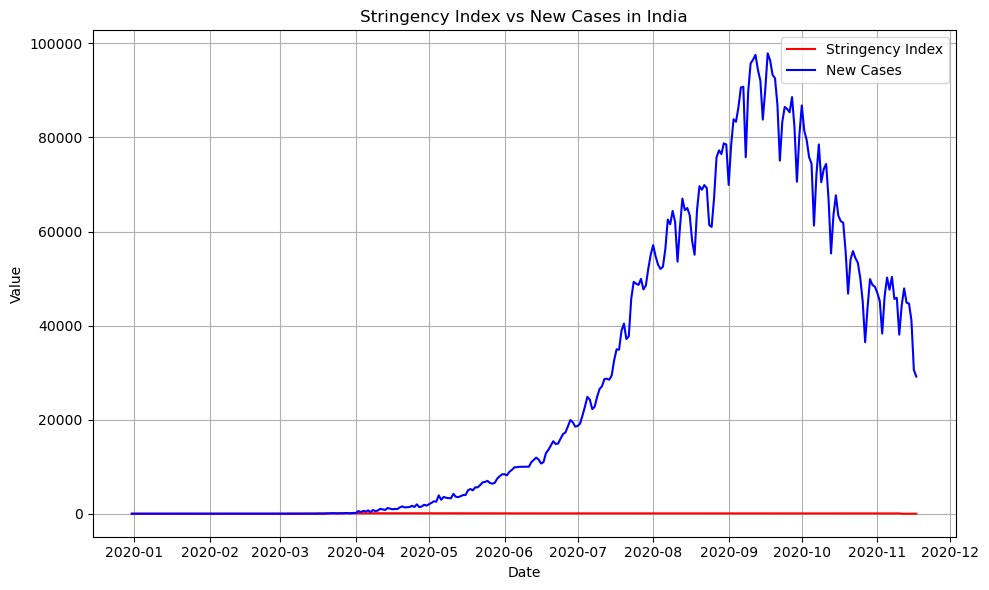

In [71]:
# --- 3. Impact of Lockdown (Stringency Index) on New Cases ---
if 'stringency_index' in df_country.columns:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_country, x='date', y='stringency_index', label='Stringency Index', color='red')
    sns.lineplot(data=df_country, x='date', y='new_cases', label='New Cases', color='blue')
    plt.title(f'Stringency Index vs New Cases in {country}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

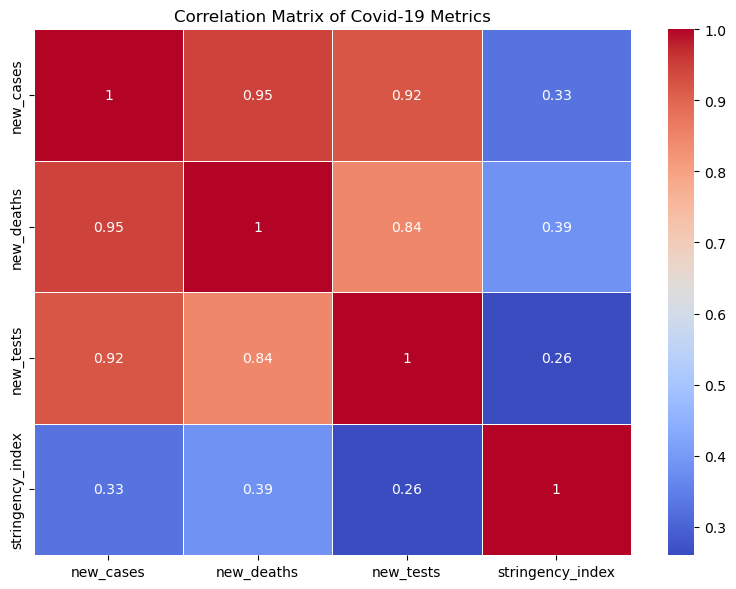

In [33]:
# --- 4. Correlation Matrix for Key Indicators ---
features = ['new_cases', 'new_deaths', 'new_tests', 'stringency_index']
corr = df_country[features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Covid-19 Metrics')
plt.tight_layout()
plt.show()